classification of cats and dogs using pretrained MobileNet model

In [14]:
import numpy as np
import keras
from keras import backend as k
# from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten,Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import *
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
mobile = keras.applications.mobilenet.MobileNet()

In [16]:
def prepare_image(file):
    img_path = 'images/'
    img = image.load_img(img_path+file,target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array,axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [17]:
from IPython.display import Image

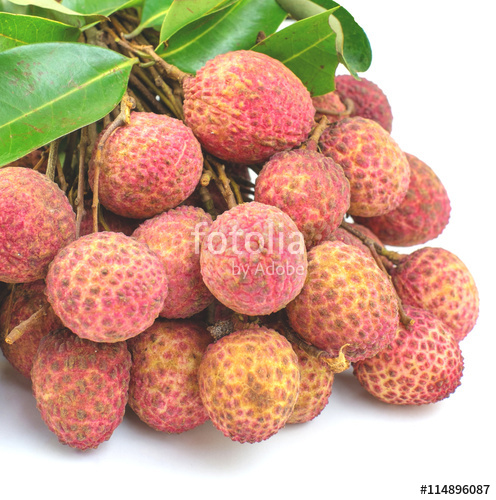

In [18]:
Image('images/lichi.jpg', width=300,height=180)

In [27]:
preprocess_img = prepare_image('lichi.jpg')
prediction = mobile.predict(preprocess_img)
results = imagenet_utils.decode_predictions(prediction)
results

[[('n07760859', 'custard_apple', 0.77692837),
  ('n07745940', 'strawberry', 0.20912257),
  ('n07753275', 'pineapple', 0.00306727),
  ('n07714571', 'head_cabbage', 0.0018815836),
  ('n12267677', 'acorn', 0.0011007728)]]

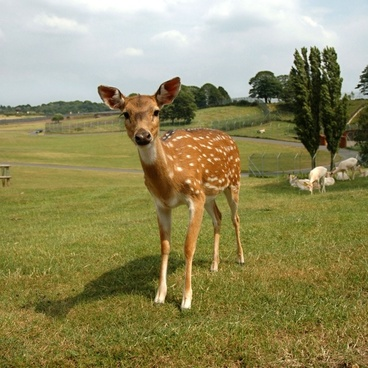

In [20]:
Image('images/deer.jpg', width=300,height=180)

In [21]:
preprocess_img = prepare_image('deer.jpg')
prediction = mobile.predict(preprocess_img)
results = imagenet_utils.decode_predictions(prediction)
results

[[('n02091244', 'Ibizan_hound', 0.7331361),
  ('n02091032', 'Italian_greyhound', 0.071901806),
  ('n02389026', 'sorrel', 0.05626875),
  ('n02437616', 'llama', 0.03818359),
  ('n02423022', 'gazelle', 0.022298453)]]

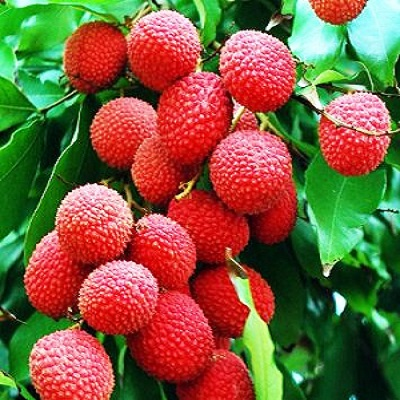

In [23]:
Image('images/lichi2.jpg', width=300,height=180)

In [24]:
preprocess_img = prepare_image('lichi2.jpg')
prediction = mobile.predict(preprocess_img)
results = imagenet_utils.decode_predictions(prediction)
results

[[('n07745940', 'strawberry', 0.9908064),
  ('n04476259', 'tray', 0.002811944),
  ('n07760859', 'custard_apple', 0.0022691498),
  ('n07749582', 'lemon', 0.0022001073),
  ('n07754684', 'jackfruit', 0.0003698094)]]

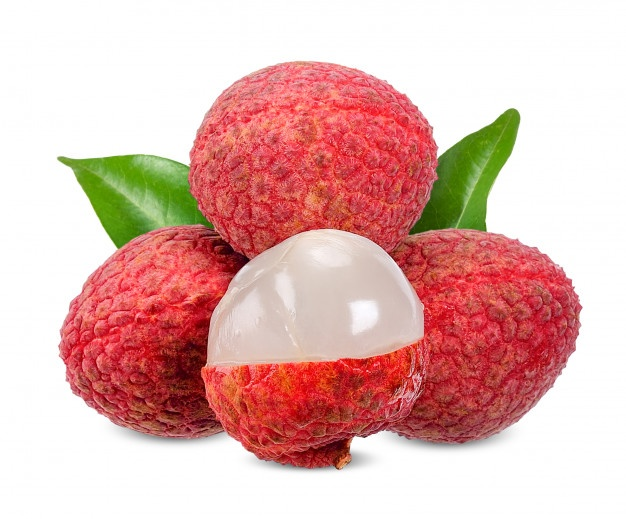

In [25]:
Image('images/lichi3.jpg', width=300,height=180)

In [26]:
preprocess_img = prepare_image('lichi2.jpg')
prediction = mobile.predict(preprocess_img)
results = imagenet_utils.decode_predictions(prediction)
results

[[('n07745940', 'strawberry', 0.9908064),
  ('n04476259', 'tray', 0.002811944),
  ('n07760859', 'custard_apple', 0.0022691498),
  ('n07749582', 'lemon', 0.0022001073),
  ('n07754684', 'jackfruit', 0.0003698094)]]

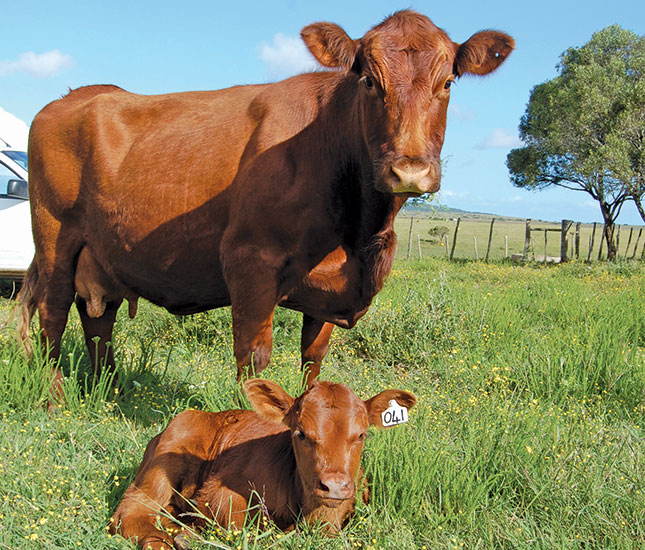

In [28]:
Image('images/cow.jpg', width=300,height=180)

In [30]:
preprocess_img = prepare_image('cow.jpg')
prediction = mobile.predict(preprocess_img)
results = imagenet_utils.decode_predictions(prediction)
results

[[('n02389026', 'sorrel', 0.50528103),
  ('n02100583', 'vizsla', 0.47252676),
  ('n02091244', 'Ibizan_hound', 0.0046881195),
  ('n02403003', 'ox', 0.004148361),
  ('n02422106', 'hartebeest', 0.003969761)]]

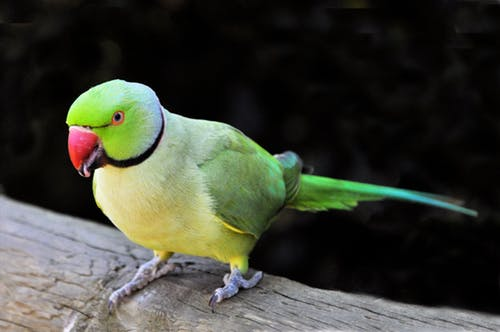

In [35]:
Image('images/parrat.jpeg', width=300,height=180)

In [37]:
preprocess_img = prepare_image('parrat.jpeg')
prediction = mobile.predict(preprocess_img)
results = imagenet_utils.decode_predictions(prediction)
results

[[('n01820546', 'lorikeet', 0.5781984),
  ('n01843383', 'toucan', 0.09811666),
  ('n01531178', 'goldfinch', 0.076903656),
  ('n01818515', 'macaw', 0.068916865),
  ('n01580077', 'jay', 0.057023745)]]

<h3>Training MobileNet on cats-and-dogs data<h3/>

In [38]:
train_path = 'cats-and-dogs/train'
valid_path = 'cats-and-dogs/valid'
test_path = 'cats-and-dogs/test'

In [39]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path,target_size=(224,224),batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path,target_size=(224,224),batch_size=4)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path,target_size=(224,224),batch_size=10,shuffle=False)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [40]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

conv_pw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_11 (DepthwiseConv2D) (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_11_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_11 (Conv2D)          (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_11_relu (ReLU)       (None, 14, 14, 512)       0         
__________

In [41]:
len(mobile.layers)

93

In [45]:
x = mobile.layers[-6].output
predictions = Dense(2,activation='softmax')(x)
model = Model(inputs=mobile.input,outputs=predictions)

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

conv_pw_10 (Conv2D)          (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_11 (DepthwiseConv2D) (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_11_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_11 (Conv2D)          (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
__________

In [47]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [48]:
len(model.layers)

89

In [49]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batches,validation_steps=4,epochs=30,verbose=2)

Epoch 1/30
 - 40s - loss: 0.9689 - acc: 0.5500 - val_loss: 1.0361 - val_acc: 0.5625
Epoch 2/30
 - 37s - loss: 0.3512 - acc: 0.8500 - val_loss: 1.0136 - val_acc: 0.5625
Epoch 3/30
 - 39s - loss: 0.2259 - acc: 0.9500 - val_loss: 0.9462 - val_acc: 0.5625
Epoch 4/30
 - 41s - loss: 0.0627 - acc: 1.0000 - val_loss: 0.9202 - val_acc: 0.5625
Epoch 5/30
 - 40s - loss: 0.0233 - acc: 1.0000 - val_loss: 0.8781 - val_acc: 0.5625
Epoch 6/30
 - 40s - loss: 0.0318 - acc: 1.0000 - val_loss: 0.8571 - val_acc: 0.6250
Epoch 7/30
 - 33s - loss: 0.0216 - acc: 1.0000 - val_loss: 0.8148 - val_acc: 0.6250
Epoch 8/30
 - 33s - loss: 0.0087 - acc: 1.0000 - val_loss: 0.7701 - val_acc: 0.6250
Epoch 9/30
 - 36s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.7220 - val_acc: 0.6875
Epoch 10/30
 - 33s - loss: 0.0116 - acc: 1.0000 - val_loss: 0.6735 - val_acc: 0.6875
Epoch 11/30
 - 38s - loss: 0.0242 - acc: 1.0000 - val_loss: 0.6429 - val_acc: 0.6875
Epoch 12/30
 - 33s - loss: 0.0120 - acc: 1.0000 - val_loss: 0.6171 - val_a

In [52]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [53]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [54]:
prediction = model.predict_generator(test_batches,steps=1,verbose=0)

In [55]:
prediction.argmax(axis=1)

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [59]:
cm = confusion_matrix(test_labels, prediction.argmax(axis=1))

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j]>thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0]
 [1 4]]


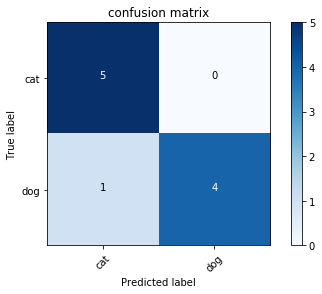

In [61]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title='confusion matrix')